In [11]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [12]:
import pandas as pd
df = pd.read_csv('AB_NYC_2019.csv')

In [13]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [14]:
len(df)

48895

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [16]:
# Step 4: Check for Missing Values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [18]:
df.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [19]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [20]:
df.reviews_per_month.isnull().sum()

np.int64(0)

In [21]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [22]:
len(df.neighbourhood.unique())

221

In [23]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [24]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [25]:
# Exploring and Visualizing Data
top_host=df.host_id.value_counts().head(10)
top_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [26]:
top_host_check=df.calculated_host_listings_count.max()
top_host_check

np.int64(327)

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [28]:
top_host_df = pd.DataFrame({'Host_ID': top_host.index, 'P_Count': top_host.values})
top_host_df.reset_index(drop=True, inplace=True)
top_host_df


,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\278717980.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\278717980.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

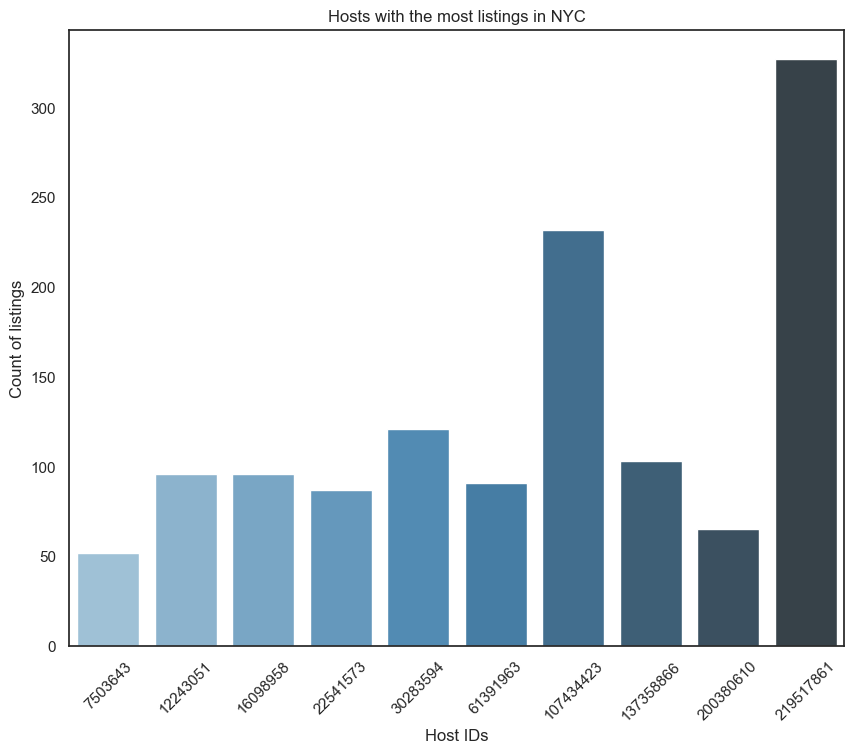

In [29]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [30]:
# Filtering price data by neighbourhood_group
sub1 = df[df['neighbourhood_group'] == 'Brooklyn']['price']
sub2 = df[df['neighbourhood_group'] == 'Manhattan']['price']
sub3 = df[df['neighbourhood_group'] == 'Queens']['price']
sub4 = df[df['neighbourhood_group'] == 'Staten Island']['price']
sub5 = df[df['neighbourhood_group'] == 'Bronx']['price']

# Putting all the price Series into a list
price_list_by_n = [sub1, sub2, sub3, sub4, sub5]


In [31]:
p_l_b_n_2 = []

# List of neighborhood names
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# Loop through each price Series
for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]  # Take only 25%, 50%, 75%, min, max
    i = i.to_frame()  # Convert Series to DataFrame
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

# Rename the price column to the neighborhood name
for idx in range(len(p_l_b_n_2)):
    p_l_b_n_2[idx].rename(columns={'price': nei_list[idx]}, inplace=True)

# Finalize the dataframe
stat_df = [df.set_index('Stats') for df in p_l_b_n_2]
final_stat_df = stat_df[0].join(stat_df[1:])

final_stat_df


,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


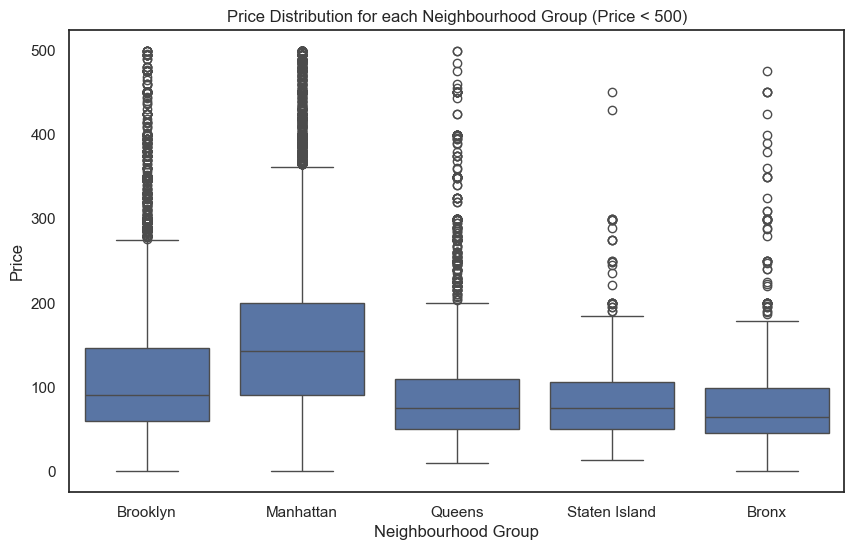

In [37]:
# Creating a sub-dataframe with prices less than 500
sub_6 = df[df.price < 500]

# Using boxplot to show spread and outliers of prices
plt.figure(figsize=(10,6))
viz_2 = sns.boxplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Price Distribution for each Neighbourhood Group (Price < 500)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()


In [38]:
df.neighbourhood.value_counts().head(10)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

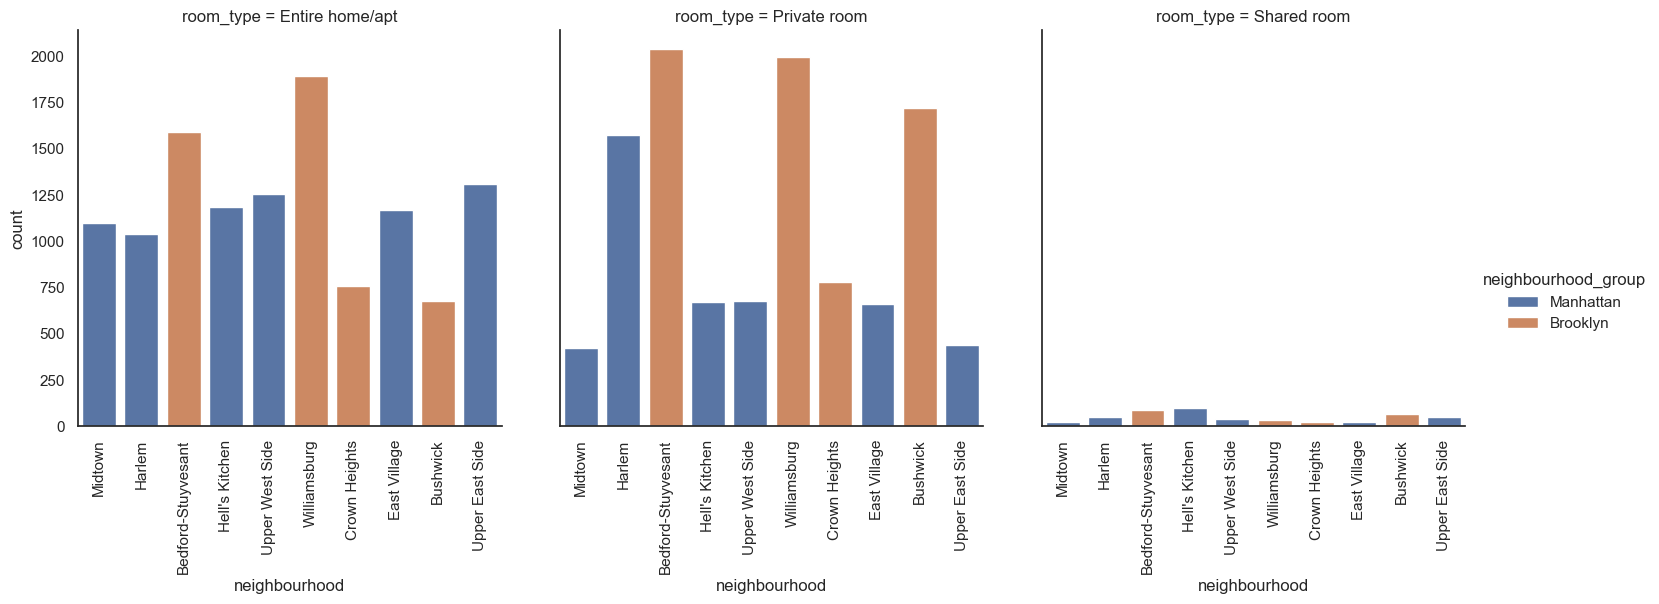

In [39]:

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

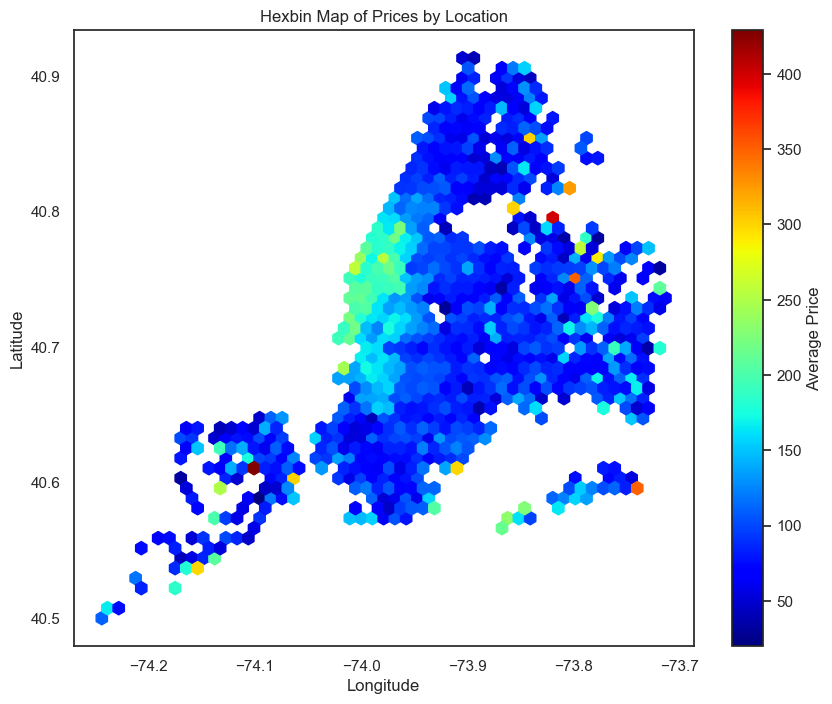

In [40]:
plt.figure(figsize=(10,8))
viz_4 = plt.hexbin(sub_6['longitude'], sub_6['latitude'], gridsize=50, cmap='jet', 
                   C=sub_6['price'], reduce_C_function=np.mean)  # color by average price
plt.colorbar(label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Map of Prices by Location')
plt.show()


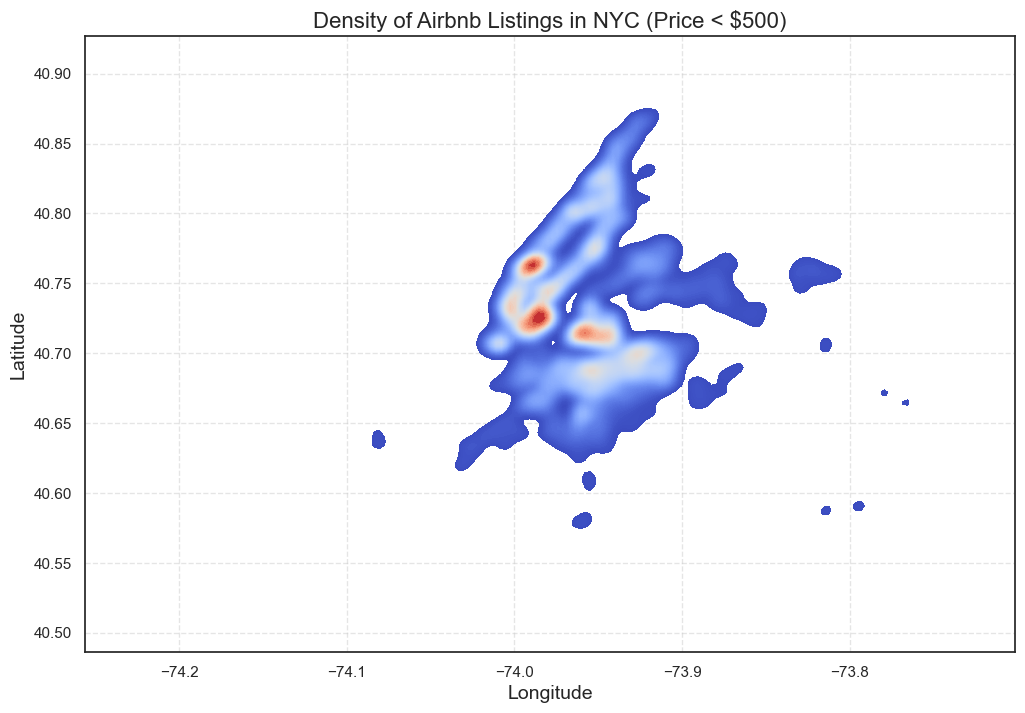

In [41]:
plt.figure(figsize=(12,8))
sns.kdeplot(
    x=sub_6['longitude'], 
    y=sub_6['latitude'], 
    cmap="coolwarm",   # another nice colormap
    fill=True, 
    bw_adjust=0.5,     # adjust smoothness (lower = sharper)
    thresh=0.1,        # slightly higher threshold to ignore noise
    levels=100         # finer color levels
)
plt.title('Density of Airbnb Listings in NYC (Price < $500)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


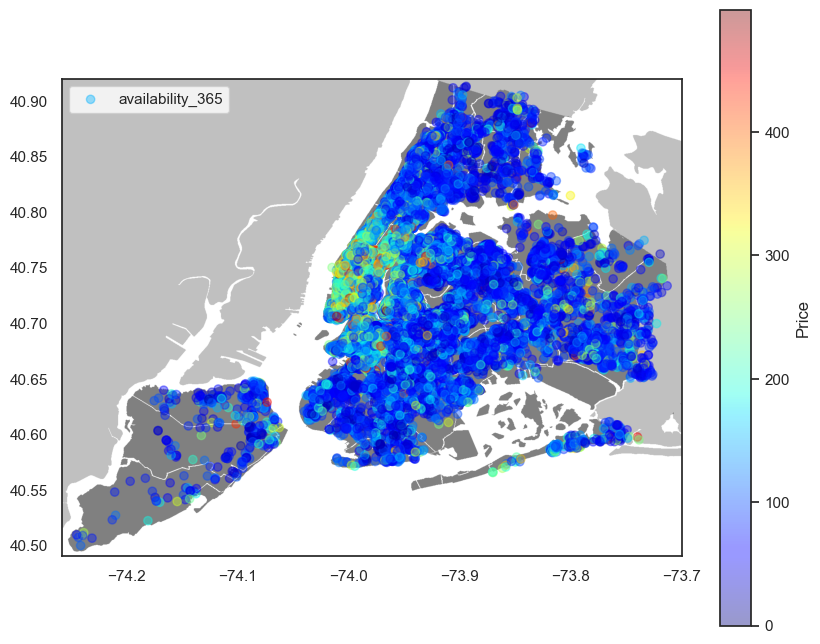

In [42]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# initializing the figure size
plt.figure(figsize=(10, 8))

# loading the NYC image properly
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
i = urllib.request.urlopen(url)
nyc_img = Image.open(i)
nyc_img = np.array(nyc_img)  # convert to numpy array for plt.imshow

# scaling the image based on latitude and longitude boundaries
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

ax = plt.gca()

# using scatter plot properly
scatter = ax.scatter(
    sub_6['longitude'], 
    sub_6['latitude'], 
    c=sub_6['price'], 
    cmap='jet', 
    alpha=0.4, 
    zorder=5,
    label='availability_365'
)

# add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Price')

plt.legend()
plt.show()


In [43]:
_names_=[]
#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [46]:
from collections import Counter
#top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [47]:
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\3937572106.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_5 = sns.barplot(x='Words', y='Count', data=sub_w, palette=palette)
C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\3937572106.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)


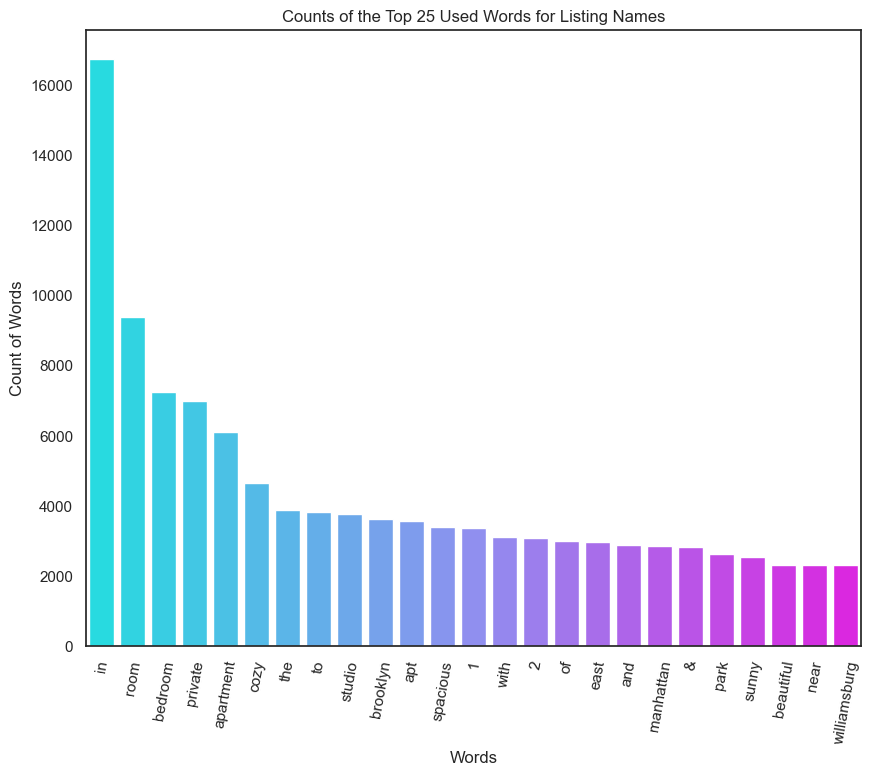

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a color palette (choose a colormap like 'viridis', 'plasma', 'cool', etc.)
palette = sns.color_palette("cool", n_colors=len(sub_w))

# Draw barplot
viz_5 = sns.barplot(x='Words', y='Count', data=sub_w, palette=palette)

# Titles and labels
viz_5.set_title('Counts of the Top 25 Used Words for Listing Names')
viz_5.set_ylabel('Count of Words')
viz_5.set_xlabel('Words')

# Rotate x-axis labels for better visibility
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

plt.show()


In [49]:

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [52]:
price_avrg = top_reviewed_listings['price'].mean()
print('Average price per night: {:.2f}'.format(price_avrg))


Average price per night: 65.40


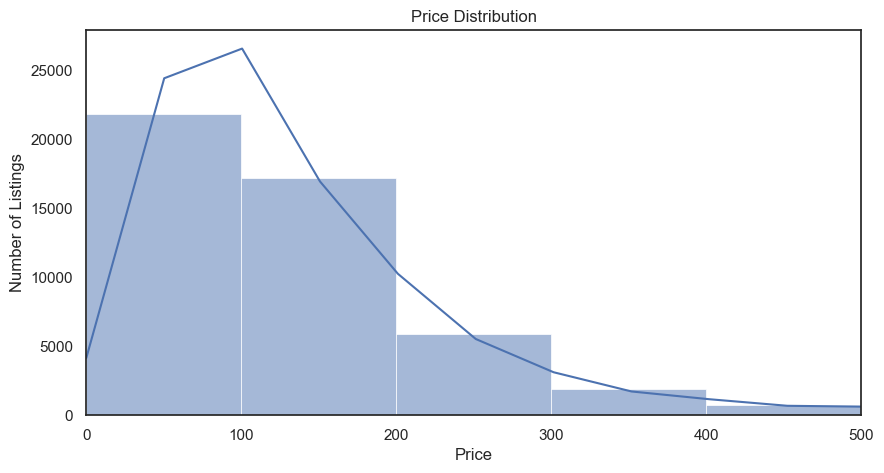

In [53]:
# Step 7: Univariate Analysis

# Plotting distribution of prices
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 500)  # ignoring extreme prices for better visualization
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\3079441157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='cool')


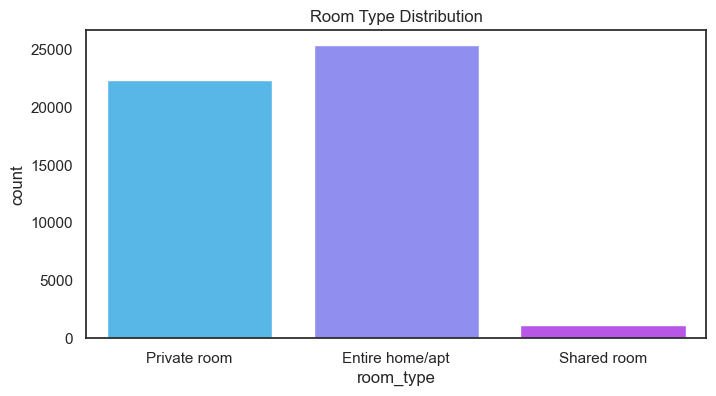

In [54]:
# Plot Room Type Counts
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='room_type', palette='cool')
plt.title('Room Type Distribution')
plt.show()


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\3255989170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='rainbow')


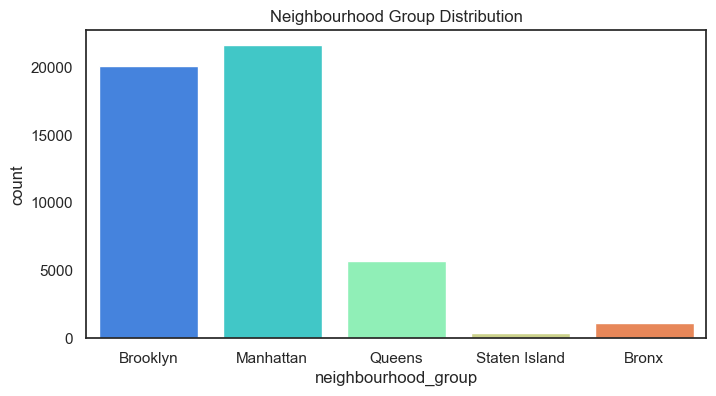

In [55]:
# Neighborhood Group Distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='neighbourhood_group', palette='rainbow')
plt.title('Neighbourhood Group Distribution')
plt.show()


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\2588535339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='room_type', y='price', palette='Set2', jitter=True, alpha=0.5)


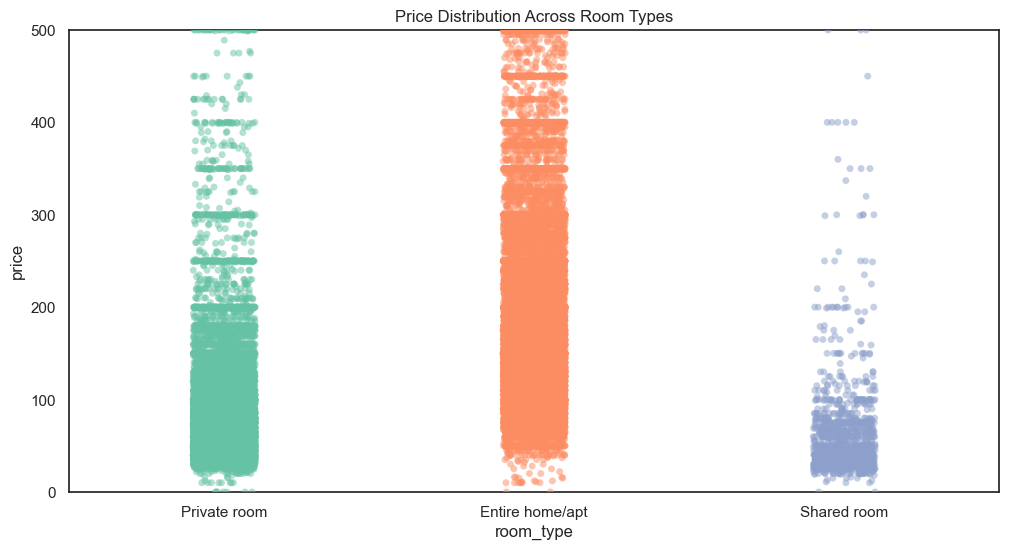

In [58]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df, x='room_type', y='price', palette='Set2', jitter=True, alpha=0.5)
plt.ylim(0, 500)
plt.title('Price Distribution Across Room Types')
plt.show()




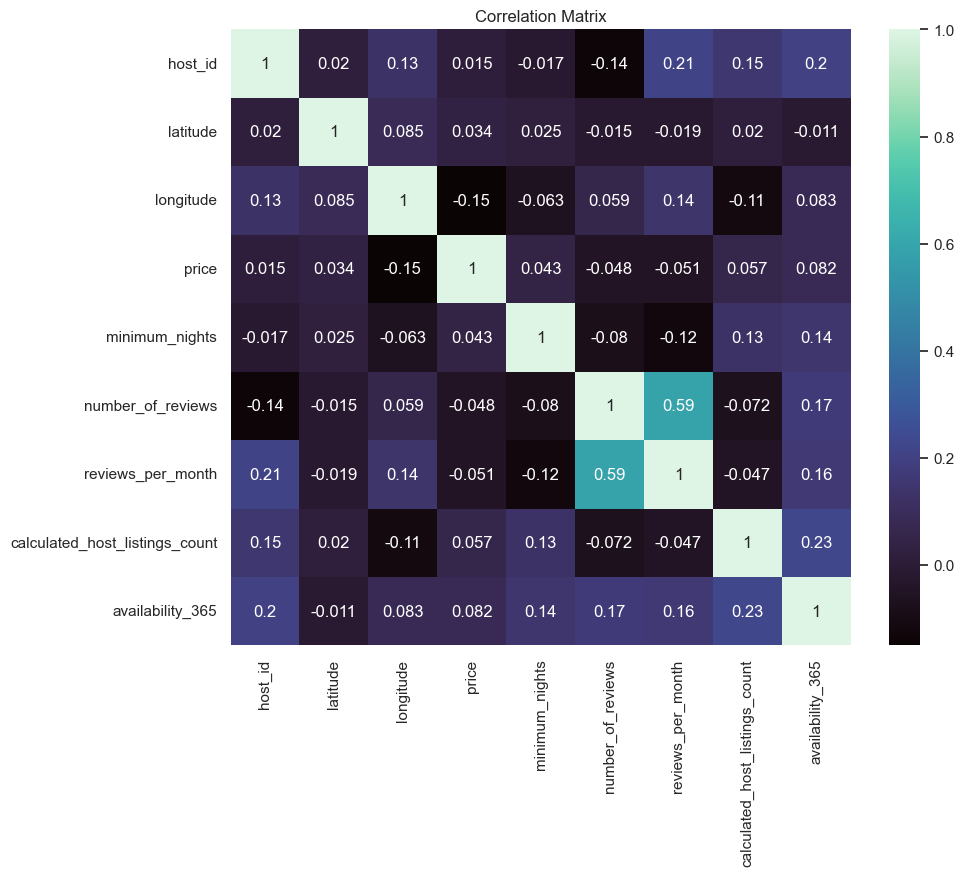

In [59]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlation Matrix')
plt.show()


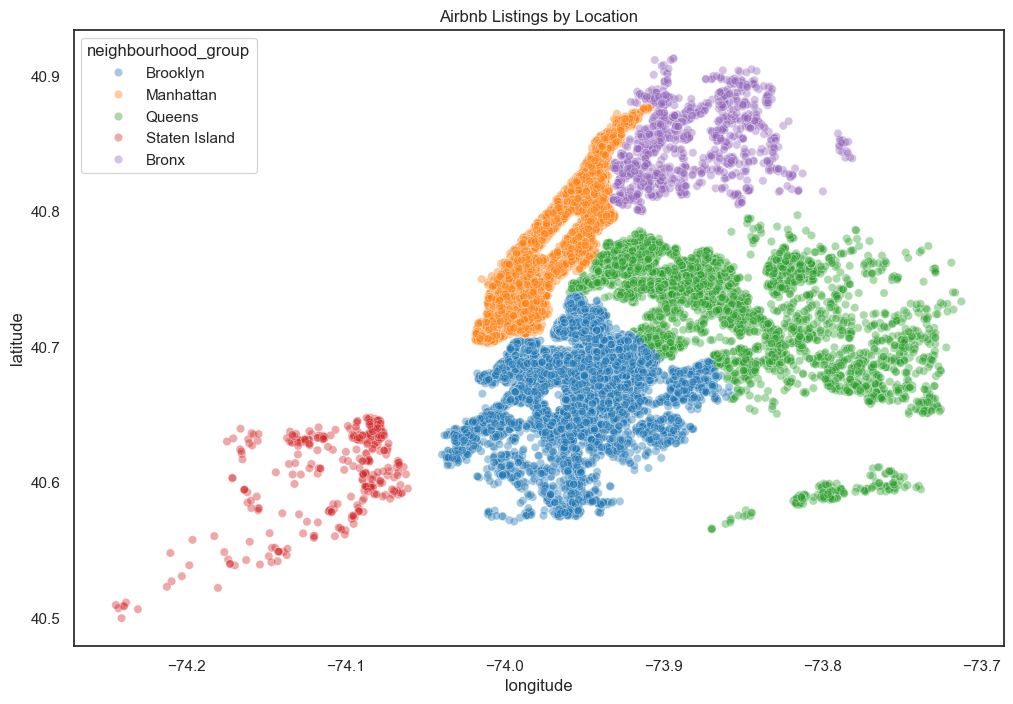

In [ ]:
# Geographical Plot (Scatter plot by Longitude and Latitude)

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.4, palette='tab10')
plt.title('Airbnb Listings by Location')
plt.show()


host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\3752738827.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='viridis')


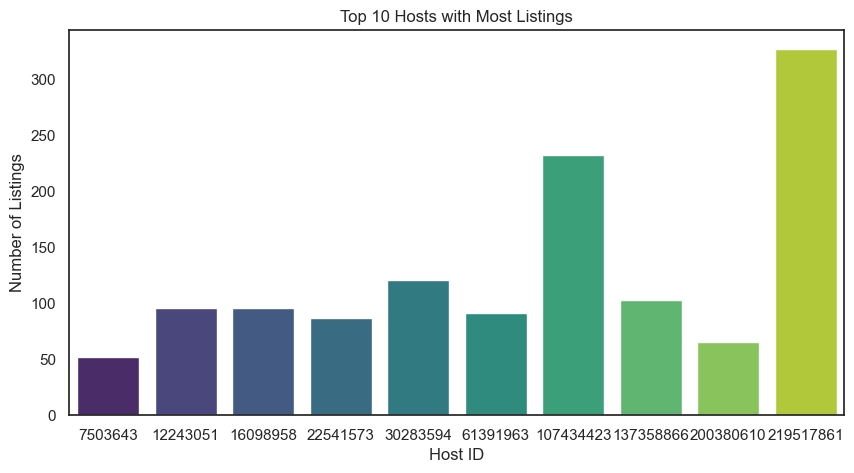

In [61]:
top_hosts = df['host_id'].value_counts().head(10)
print(top_hosts)

plt.figure(figsize=(10,5))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='viridis')
plt.title('Top 10 Hosts with Most Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.show()

In [62]:
df.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [63]:
top5_by_listings = df['name'].value_counts().head(5)
print("Top 5 names by number of listings:")
print(top5_by_listings)


Top 5 names by number of listings:
name
Hillside Hotel                      18
Home away from home                 17
New york Multi-unit building        16
Brooklyn Apartment                  12
Loft Suite @ The Box House Hotel    11
Name: count, dtype: int64


In [64]:
top5_by_reviews = df.sort_values('number_of_reviews', ascending=False)[['name', 'number_of_reviews']].head(5)
print("\nTop 5 names by number of reviews:")
print(top5_by_reviews)



Top 5 names by number of reviews:
                                 name  number_of_reviews
11759         Room near JFK Queen Bed                629
2031       Great Bedroom in Manhattan                607
2030   Beautiful Bedroom in Manhattan                597
2015     Private Bedroom in Manhattan                594
13495         Room Near JFK Twin Beds                576


In [65]:
average_price = df['price'].mean()
print(f"Average Price per Night: ${average_price:.2f}")


Average Price per Night: $152.72


In [67]:
df['occupancy_rate'] = df['availability_365'] / 365
avg_occupancy_rate = df['occupancy_rate'].mean()
print(f"Average Occupancy Rate: {avg_occupancy_rate*100:.2f}%")


Average Occupancy Rate: 30.90%


In [68]:
average_reviews_per_listing = df['number_of_reviews'].mean()
print(f"Average Reviews per Listing: {average_reviews_per_listing:.2f}")


Average Reviews per Listing: 23.27


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\4223618059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='number_of_reviews', data=df, palette='Set2')


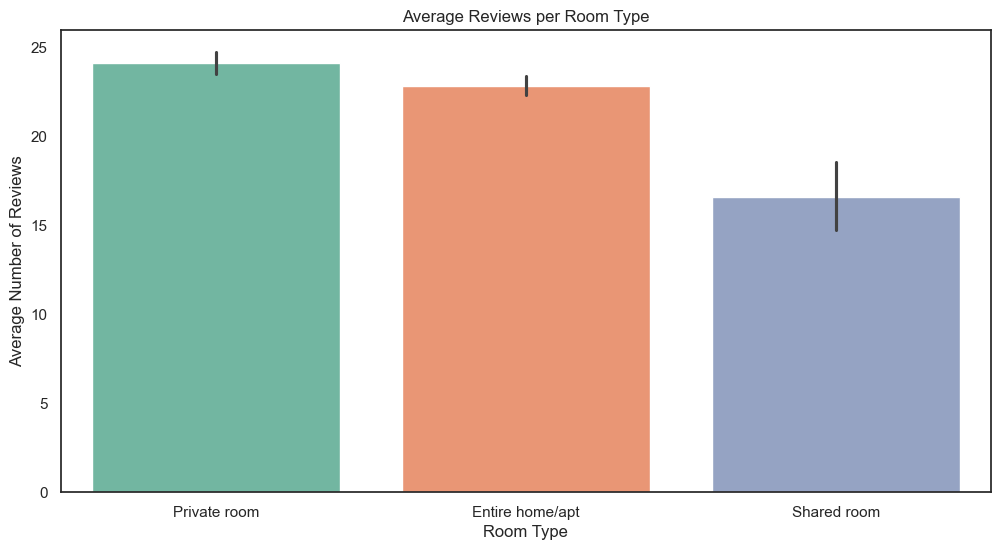

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x='room_type', y='number_of_reviews', data=df, palette='Set2')
plt.title('Average Reviews per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.show()


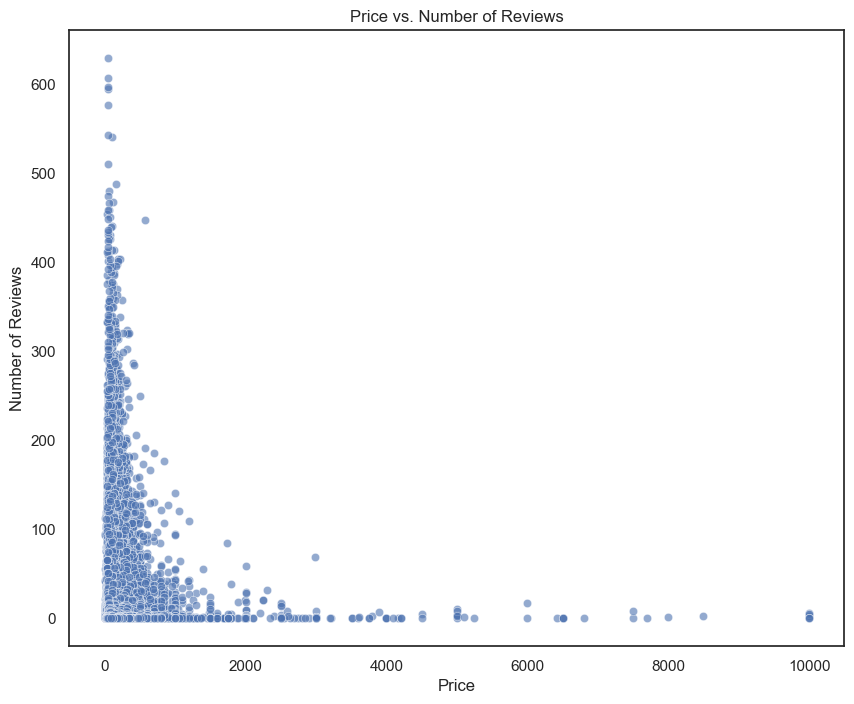

In [71]:
sns.scatterplot(data=df, x='price', y='number_of_reviews', alpha=0.6)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()


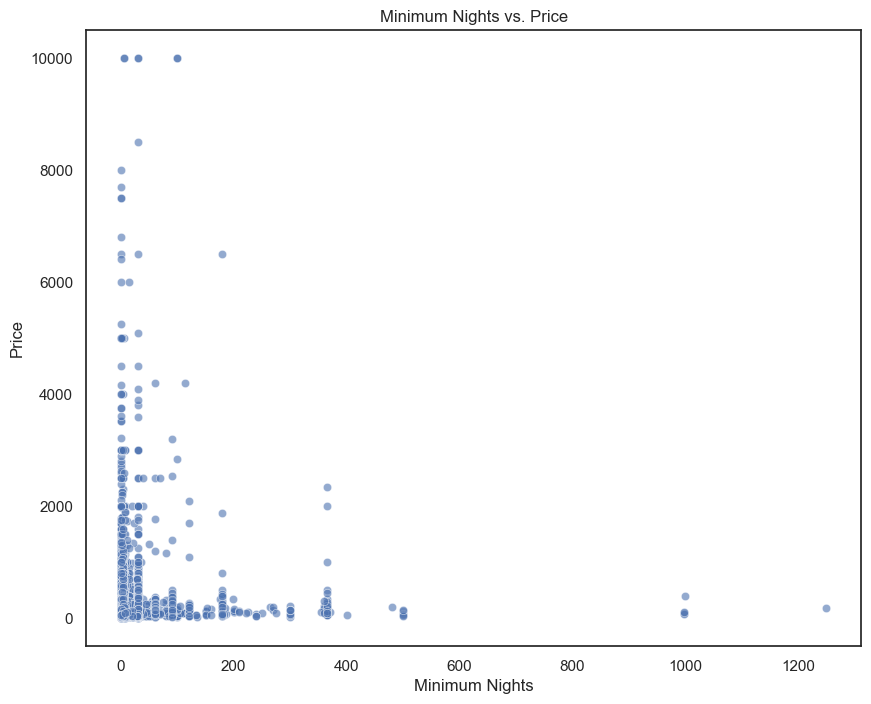

In [75]:
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.6)
plt.title('Minimum Nights vs. Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()


In [76]:
neighborhood_performance = df.groupby('neighbourhood_group')[['price', 'number_of_reviews', 'occupancy_rate']].mean()
print(neighborhood_performance)


                          price  number_of_reviews  occupancy_rate
neighbourhood_group                                               
Bronx                 87.496792          26.004583        0.454134
Brooklyn             124.383207          24.202845        0.274609
Manhattan            196.875814          20.985596        0.306793
Queens                99.517649          27.700318        0.395758
Staten Island        114.812332          30.941019        0.547064


In [77]:
listings_per_host = df.groupby('host_id').size().sort_values(ascending=False).head(5)
print(f"Top 5 Hosts with Most Listings:\n{listings_per_host}")


Top 5 Hosts with Most Listings:
host_id
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
dtype: int64


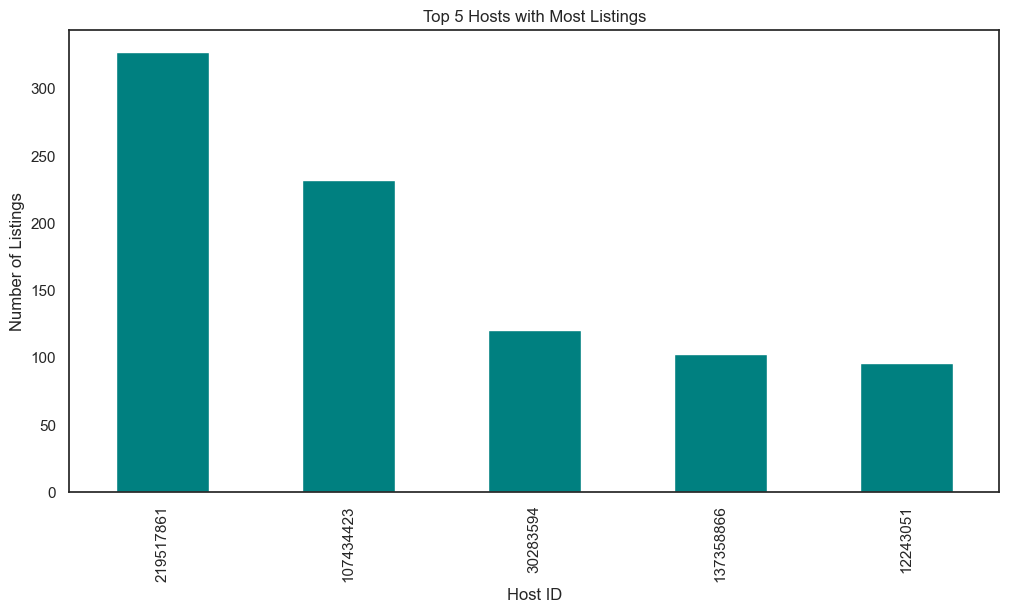

In [78]:
top_hosts = listings_per_host.head(5)
top_hosts.plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Top 5 Hosts with Most Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.show()


In [79]:
df['cancellation_rate'] = df['number_of_reviews'] / (df['availability_365'] + df['number_of_reviews'])


In [80]:
avg_price_by_room = df.groupby('room_type')['price'].mean()
print(f"Average Price by Room Type:\n{avg_price_by_room}")


Average Price by Room Type:
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_16272\2257648379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_room.index, y=avg_price_by_room.values, palette='Set2')


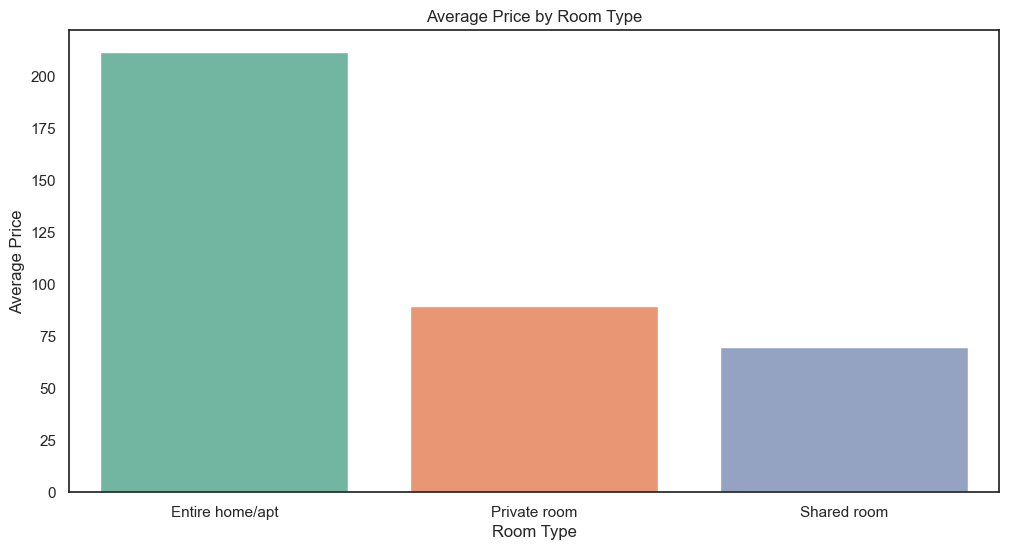

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_room.index, y=avg_price_by_room.values, palette='Set2')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.show()
